<a href="https://colab.research.google.com/github/PedroReste/producao_hospitalar_no_brasil/blob/main/Notebook/producao_hospitalar_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Dados por ano


In [95]:
#Arrumando os dados para aparecerem com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [97]:
#Importando os dados
db_ano = 'https://raw.githubusercontent.com/PedroReste/producao_hospitalar_no_brasil/main/Dados/producao_hospitalar_por_processamento_e_valor_total_por_ano.csv'
db_ano = pd.read_csv(db_ano, encoding='ISO-8859-1', skiprows = 3, sep=';', skipfooter= 12, thousands='.', decimal=',')
db_ano[['N', 'Estados']] = db_ano['Unidade da Federação'].str.split(' ', n=1, expand=True)
db_ano.drop(columns= 'N', inplace= True)
db_ano.drop(columns= 'Unidade da Federação', inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [98]:
#Mudando a valor da coluna Estados para sigla dos Estados
estados = {'Acre':'AC', 'Alagoas':'AL', 'Amapá':'AP', 'Amazonas':'AM', 'Bahia':'BA', 'Ceará':'CE',
           'Distrito Federal':'DF', 'Espírito Santo':'ES', 'Goiás':'GO', 'Maranhão':'MA', 'Mato Grosso':'MT',
           'Mato Grosso do Sul':'MS', 'Minas Gerais':'MG', 'Pará':'PA', 'Paraíba':'PB', 'Paraná':'PR', 'Pernambuco':'PE',
           'Piauí':'PI', 'Rio de Janeiro':'RJ', 'Rio Grande do Norte':'RN', 'Rio Grande do Sul':'RS', 'Rondônia':'RO',
           'Roraima':'RR', 'Santa Catarina':'SC', 'São Paulo':'SP', 'Sergipe':'SE','Tocantins':'TO'}

db_ano['Estados'].replace(estados, inplace=True)

In [99]:
db_ano.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total,Estados
0,28678308.60,43168433.96,51784823.62,54267636.35,51181258.99,66472516.81,79095836.74,86163443.56,91955338.88,95261076.71,102091843.39,109113101.49,110011617.10,153823672.46,20693761.45,1143762670.11,RO
1,22365143.69,27339128.19,28773343.06,33510058.61,32929373.49,33605893.87,36039320.36,37262018.93,40487149.58,37245525.42,34432565.81,34709598.96,40018213.54,50689465.28,6971699.60,496378498.39,AC
2,95655211.98,105997335.28,114040833.27,121643071.13,124449598.86,129056584.80,121900696.54,151278739.06,147812237.69,160820207.41,175744827.43,189256198.89,210298047.43,81963400.17,4771357.09,1934688347.03,AM
3,10983016.60,17116094.26,20249589.01,17108611.37,21279908.04,21540894.01,19757952.27,24556486.66,29133807.87,31338348.90,33851454.13,34320141.86,36868427.83,43779114.13,6121666.50,368005513.44,RR
4,269639839.22,317444388.93,320749087.16,321149377.64,315536309.93,340687749.39,342851637.96,353977050.33,357148898.98,388952636.23,410173716.47,410805540.79,447222369.54,539627081.07,84266698.04,5220232381.68,PA


#Dados por mês

In [91]:
#Arrumando os dados para aparecerem com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [92]:
#Importando os dados
db = 'https://raw.githubusercontent.com/PedroReste/producao_hospitalar_no_brasil/main/Dados/producao_hospitalar_por_processamento_e_valor_total_por_mes.csv'
db = pd.read_csv(db, encoding='ISO-8859-1', skiprows = 3, sep=';', skipfooter= 12, thousands='.', decimal=',')
db[['N', 'Estados']] = db['Unidade da Federação'].str.split(' ', n=1, expand=True)
db.drop(columns= 'N', inplace= True)
db.drop(columns= 'Unidade da Federação', inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [93]:
#Mudando a valor da coluna Estados para sigla dos Estados
estados = {'Acre':'AC', 'Alagoas':'AL', 'Amapá':'AP', 'Amazonas':'AM', 'Bahia':'BA', 'Ceará':'CE',
           'Distrito Federal':'DF', 'Espírito Santo':'ES', 'Goiás':'GO', 'Maranhão':'MA', 'Mato Grosso':'MT',
           'Mato Grosso do Sul':'MS', 'Minas Gerais':'MG', 'Pará':'PA', 'Paraíba':'PB', 'Paraná':'PR', 'Pernambuco':'PE',
           'Piauí':'PI', 'Rio de Janeiro':'RJ', 'Rio Grande do Norte':'RN', 'Rio Grande do Sul':'RS', 'Rondônia':'RO',
           'Roraima':'RR', 'Santa Catarina':'SC', 'São Paulo':'SP', 'Sergipe':'SE','Tocantins':'TO'}

db['Estados'].replace(estados, inplace=True)

In [94]:
db.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total,Estados
0,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,14735061.31,13054440.15,12106427.42,9762335.30,11068276.73,10840980.86,10514614.33,10179147.12,1143762670.11,RO
1,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4979239.30,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,496378498.39,AC
2,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,3040801.51,2872635.38,3192051.90,2876263.83,3049820.67,2988371.19,2911575.67,1859781.42,1934688347.03,AM
3,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3743330.65,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,368005513.44,RR
4,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46325171.75,45116555.91,45771568.39,45027064.69,44530008.58,43753637.79,43065981.61,41200716.43,5220232381.68,PA


In [8]:
db.tail()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,Total,Estados
22,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,153107385.76,137549257.39,122943615.91,114704433.96,115169141.61,114399256.81,102332897.96,104962264.26,14177336638.25,RS
23,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,...,31984745.11,36713343.08,33140371.78,23996334.39,24343257.72,22003059.87,21886082.43,23709509.16,2634865147.47,MS
24,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,...,39215412.56,38962080.83,29287201.72,27855943.04,21487902.16,20245893.61,19745197.96,18149290.94,2497827005.94,MT
25,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,...,72686178.78,72453553.63,67262247.67,58312298.08,43197488.99,44249364.82,44423904.35,38882545.69,5618918011.06,GO
26,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,15048607.23,...,29662716.67,27288766.94,28509985.96,26207429.15,25147458.57,22742916.21,24945761.01,24404092.99,2901904274.70,DF


In [13]:
db.sort_values('2008/Jan', ascending= False, inplace= True)

Text(0.5, 0, '')

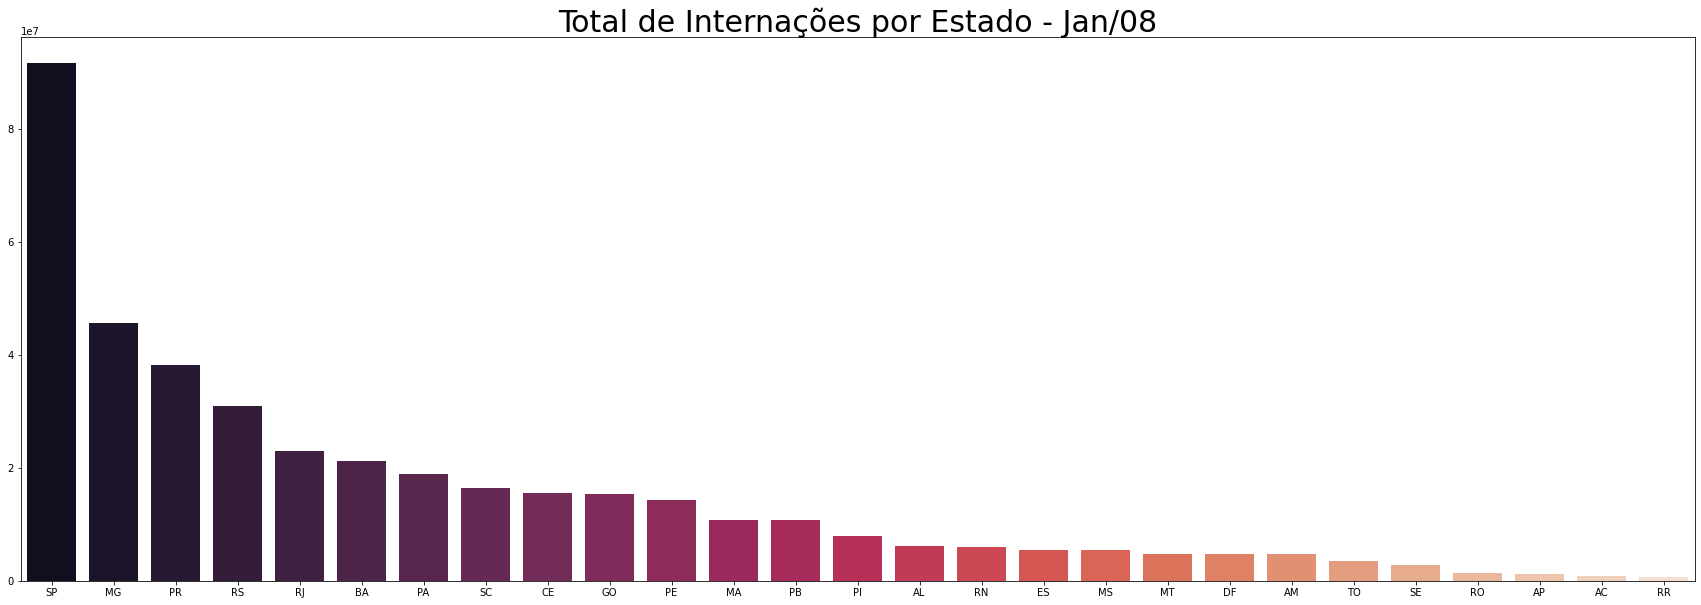

In [14]:
ax = plt.figure(figsize=(30,10))
ax = sns.barplot(data= db, y= '2008/Jan', x= 'Estados', palette="rocket")
ax = plt.title('Total de Internações por Estado - Jan/08', size= 30)
ax = plt.ylabel("")
ax = plt.xlabel("")
ax

In [90]:
ano = db.T
ano['Data'] = ano.index
ano.reset_index(inplace= True, drop=True)
ano[['Ano', 'Mês']] = ano['Data'].str.split('/', n=1, expand=True)
ano.drop(columns='Data', inplace=True)
ano.drop(columns='Mês', inplace=True)
ano = ano.T
ano.head()

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,14735061.31,13054440.15,12106427.42,9762335.30,11068276.73,10840980.86,10514614.33,10179147.12,1143762670.11,RO
1,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4979239.30,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,496378498.39,AC
2,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,3040801.51,2872635.38,3192051.90,2876263.83,3049820.67,2988371.19,2911575.67,1859781.42,1934688347.03,AM
3,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3743330.65,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,368005513.44,RR
4,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46325171.75,45116555.91,45771568.39,45027064.69,44530008.58,43753637.79,43065981.61,41200716.43,5220232381.68,PA


In [75]:
ano = ano.T

In [81]:
ano['Estados'] = ano.index
ano.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Estados
Estados,,,,,,,,,,,,,,,,,,,,,
SP,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,3268008800.52,3285221792.79,3305056173.67,3361179945.39,3442007311.77,3567637040.10,3806208857.72,5060248417.55,661357856.72,SP
MG,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,1658840666.80,1674939603.04,1657939988.05,1718544163.79,1790290126.08,1889157110.44,1900368797.53,2646556958.05,361837972.74,MG
PR,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,...,1063177083.80,1116764284.11,1224621412.80,1333212214.45,1453914663.28,1493484390.79,1406028330.20,1868002316.49,263052086.03,PR
RS,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,1025980732.27,1076735540.93,1046635638.70,1053347905.55,1074036199.48,1131618227.23,1186666108.70,1567289161.92,207295162.22,RS
RJ,23025258.52,28394310.93,44567062.94,44054604.82,44911021.15,48056212.24,49872379.35,50912706.60,49270352.76,46434912.38,...,765976172.49,814738275.82,790282302.29,853543221.39,918095799.51,976876703.73,1032894622.93,1412722423.35,200724683.76,RJ
